In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import gamma

import utils

In [2]:
n_samples = 100000
n_leaves = 500

draw_ = utils.draw_epl(n_samples=n_samples, n_leaves=n_leaves)

In [3]:
q = np.ceil(np.log2(n_leaves))
# epl_min = (q + 1) * n_leaves - 2**q
epl_min = np.min(draw_)
epl_max = np.max(draw_)
mu_n = utils.exp_epln_exact(n_leaves)
sigma2_n = utils.var_epl_exact(n_leaves)
m_n = (mu_n - epl_min)

### Part 1: Scaling to fixed first moment

In [4]:
draw1 = (draw_ - epl_min) / m_n

In [5]:
shape = m_n**2 / sigma2_n
scale = 1 / shape
print(f"Shape: {shape}, Scale: {scale}")

Shape: 5.656055875592769, Scale: 0.17680164800267242


In [6]:
n_bins = 100
hist, bins = np.histogram(draw1, bins=n_bins, density=True)
centers = (bins[:-1] + bins[1:]) / 2

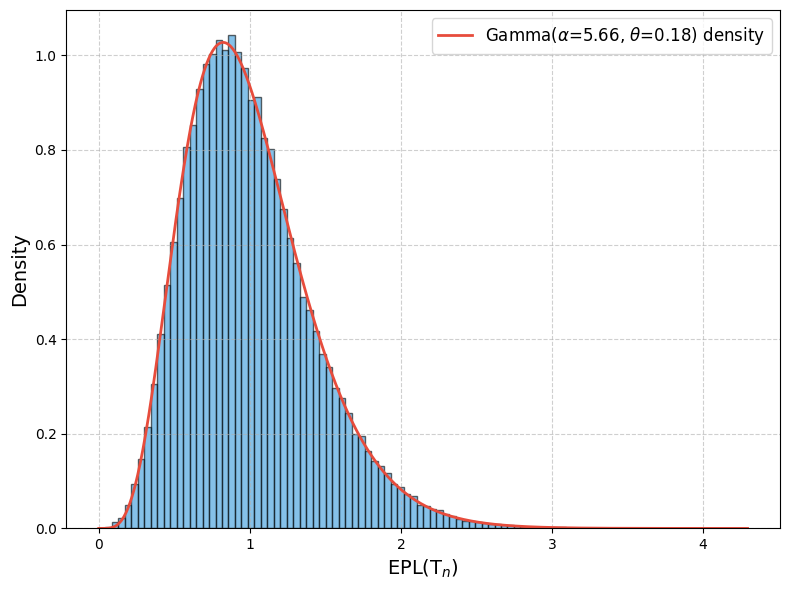

In [7]:
xvals = np.linspace(bins[0], bins[-1], 1000)
gamma_pdf = gamma.pdf(xvals, shape, scale=scale)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(draw1, bins=n_bins, density=True, alpha=0.6, color='#3498db', edgecolor='black')
ax.plot(xvals, gamma_pdf, color='#e74c3c', lw=2, label=rf"Gamma($\alpha$={shape:.2f}, $\theta$={scale:.2f}) density")
ax.set_xlabel(r'$\mathrm{EPL}(\mathrm{T}_n)$', fontsize=14)
ax.set_ylabel(r'Density', fontsize=14)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.tight_layout()

plt.show()

### Part 2: Scaling to fixed ratio of first moment and variance

In [8]:
draw2 = (draw_ - epl_min) * m_n / sigma2_n

In [9]:
shape = m_n**2 / sigma2_n
scale = 1
print(f"Shape: {shape}, Scale: {scale}")

Shape: 5.656055875592769, Scale: 1


In [12]:
n_bins = 100
hist, bins = np.histogram(draw2, bins=n_bins, density=True)
centers = (bins[:-1] + bins[1:]) / 2

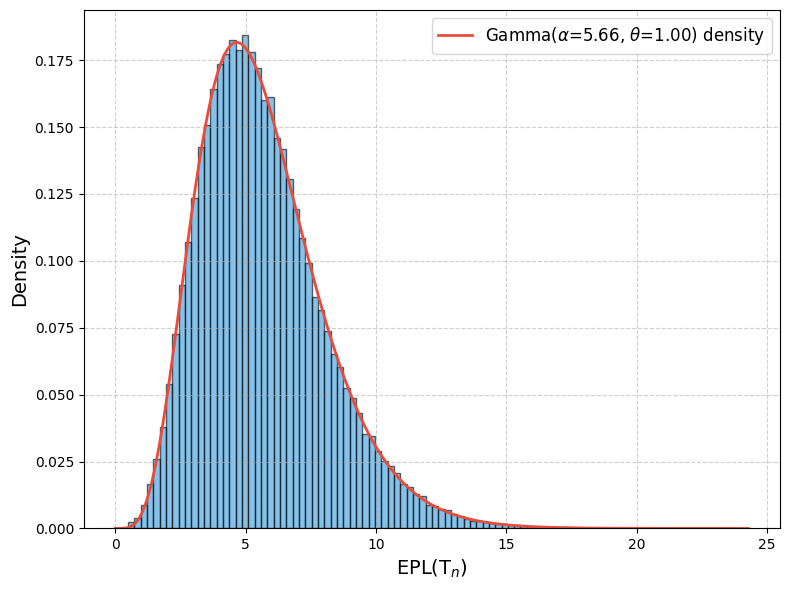

In [13]:
xvals = np.linspace(bins[0], bins[-1], 1000)
gamma_pdf = gamma.pdf(xvals, shape, scale=scale)

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(draw2, bins=n_bins, density=True, alpha=0.6, color='#3498db', edgecolor='black')
ax.plot(xvals, gamma_pdf, color='#e74c3c', lw=2, label=rf"Gamma($\alpha$={shape:.2f}, $\theta$={scale:.2f}) density")
ax.set_xlabel(r'$\mathrm{EPL}(\mathrm{T}_n)$', fontsize=14)
ax.set_ylabel(r'Density', fontsize=14)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.tight_layout()

plt.show()